## Business Understanding

### `Project Description`
Imagine being at the helm of a business with a treasure trove of transactional data, brimming with untapped potential, yet unable to harness its power. That's where our client finds themselves—a company sitting on a goldmine of 2019 transactional data, eager to uncover insights that could propel their business to new heights. They've turned to us, seeking a transformative business intelligence solution that not only answers their pressing questions but also illuminates hidden opportunities to boost sales and streamline operations.

Enter getINNOtized, a dynamic organization dedicated to connecting talented data professionals with businesses in need of innovative data solutions. Through their platform, companies can leverage top-tier analytical expertise to unlock the full potential of their data. getINNOtized has assigned us this mission, confident in our ability to deliver a comprehensive, actionable business intelligence report that will empower the client to make informed, strategic decisions. Our task is clear: dive deep into this data, decode its secrets, and deliver insights that guide the client towards increased revenue and enhanced efficiency.

#### **Key Stakeholders**
The stakeholders include the client's company executives, sales and marketing team, product management team, logistics and supply chain team, IT and data team, getINNOtized and external stakeholders(investors and suppliers)

#### **Success Criteria**

The success of this project will be measured by the ability to deliver a detailed and actionable business intelligence report that answers the client's questions and provides insights for driving sales and efficiency. The report should be clear, visually appealing, and easy to understand, providing the client with a solid foundation for making data-driven decisions.

#### **Constraints and Considerations**

- Data Quality: Ensure the data is clean, accurate, and complete before analysis.
- Timeliness: The analysis and report should be delivered within the agreed-upon timeframe.
- Client Collaboration: Regular communication with the client to understand their needs and provide updates on progress.
- Tool Selection: Utilize appropriate data analysis and visualization tools to generate insights and present findings effectively.

#### **Data Requirements**
- Utilize data that was collected for each month in the entire year of 2019. The data for the first half of the year (January to June) was collected in excel and saved as csv files before management decided to use databases to store their data for analysis.

**<i>NB</i>** Additionally, categorize products based on their unit prices:
- Products with unit prices above $99.99 should be labeled as high-level products.
- Products with unit prices $99.99 and below should be labeled as basic-level products.

#### **Business Impact**
- Enhance customer satisfaction through better product availability.
- Optimize inventory management, leading to cost savings and improved operational efficiency.

### `Hypothesis`

*Null Hypothesis (Ho):* 

*Alternate Hypothesis (Ha):* 

### `Analytical Business Questions`

1. How much money did we make this year?
2. Can we identify any seasonality in the  sales?
3. What are our best and worst-selling products?
4. How do sales compare to previous months or weeks? 
5. Which cities are our products delivered to most? 
6. How do product categories compare in revenue generated and quantities  ordered?
7. You are required to show additional details from your findings in your data.

### `Importations`

In [75]:
# Import the necessary libraries

# Data Connection
import pyodbc
from dotenv import dotenv_values
from dotenv import load_dotenv
import os

# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Stats Packages
from scipy.stats import stats


# Others
from datetime import datetime
import os
from itertools import product
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

print("PACKAGE SUCCESS!! 🎉")


PACKAGE SUCCESS!! 🎉


### `Data Connection`

In [79]:


# Load environment variables from .env file
load_dotenv()

# Get the values for the credentials
server = os.getenv("server_name")
database = os.getenv("database_name")
username = os.getenv("user")
password = os.getenv("password")




In [80]:
connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

# Use the connect method of the pyodbc library and pass in the connection string.
connection = pyodbc.connect(connection_string)

In [81]:
# Get the cursor
# The connection cursor is used to execute statements to communicate with the MySQL database
cursor = connection.cursor()
# Retrieve the table names
table_names = cursor.tables(tableType='TABLE')
# Fetch all the table names
tables = table_names.fetchall()
# Print the table names
for table in tables:
    print(table.table_name)

Sales_August_2019
Sales_December_2019
Sales_July_2019
Sales_November_2019
Sales_October_2019
Sales_September_2019
change_streams_destination_type
change_streams_partition_scheme
trace_xe_action_map
trace_xe_event_map


In [82]:
# sql query to get the datasets
query = "SELECT * FROM Sales_August_2019"
query2 = "SELECT * FROM Sales_December_2019"
query3 = "SELECT * FROM Sales_July_2019"
query4 = "SELECT * FROM Sales_November_2019"
query5 = "SELECT * FROM Sales_October_2019"
query6 = "SELECT * FROM Sales_September_2019"



In [83]:
data=pd.read_sql(query,connection)
data2=pd.read_sql(query2,connection)
data3=pd.read_sql(query3,connection)
data4=pd.read_sql(query4,connection)
data5=pd.read_sql(query5,connection)
data6=pd.read_sql(query6,connection)

In [84]:
# save tables to csv
data.to_csv('data\Sales_August_2019.csv', index=False)
data2.to_csv('data\Sales_December_2019.csv', index=False)
data3.to_csv('data\Sales_July_2019.csv', index=False)
data4.to_csv('data\Sales_November_2019.csv', index=False)
data5.to_csv('data\Sales_October_2019.csv', index=False)
data6.to_csv('data\Sales_September_2019.csv', index=False)

In [85]:
# Read CSV and change Order_date column from object to date type
sales_Aug = pd.read_csv("data\Sales_August_2019.csv", parse_dates =['Order_Date'])
sales_Dec = pd.read_csv("data\Sales_December_2019.csv", parse_dates =['Order_Date'])
sales_Jul = pd.read_csv("data\Sales_July_2019.csv",parse_dates=['Order_Date'])
sales_Nov = pd.read_csv("data\Sales_November_2019.csv",parse_dates=['Order_Date'])
sales_Oct = pd.read_csv("data\Sales_October_2019.csv",parse_dates=['Order_Date'])
sales_Sept = pd.read_csv("data\Sales_September_2019.csv",parse_dates=['Order_Date'])

In [86]:
# Remove microseconds by formatting the datetime without microseconds
sales_Aug['Order_Date'] = sales_Aug['Order_Date'].dt.floor('S')
sales_Dec['Order_Date'] = sales_Dec['Order_Date'].dt.floor('S')
sales_Jul['Order_Date'] = sales_Jul['Order_Date'].dt.floor('S')
sales_Nov['Order_Date'] = sales_Nov['Order_Date'].dt.floor('S')
sales_Oct['Order_Date'] = sales_Oct['Order_Date'].dt.floor('S')
sales_Sept['Order_Date'] = sales_Sept['Order_Date'].dt.floor('S')

In [87]:
# Concatenate the datasets
data_second_half = pd.concat([
    sales_Aug,
    sales_Dec,
    sales_Jul,
    sales_Nov,
    sales_Oct,
    sales_Sept
], ignore_index=True)

In [88]:
data_second_half.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,236670.00,Wired Headphones,2.00,11.99,2031-08-19 22:21:00,"359 Spruce St, Seattle, WA 98101"
1,236671.00,Bose SoundSport Headphones,1.00,99.99,2015-08-19 15:11:00,"492 Ridge St, Dallas, TX 75001"
2,236672.00,iPhone,1.00,700.00,2006-08-19 14:40:00,"149 7th St, Portland, OR 97035"
3,236673.00,AA Batteries (4-pack),2.00,3.84,2029-08-19 20:59:00,"631 2nd St, Los Angeles, CA 90001"
4,236674.00,AA Batteries (4-pack),2.00,3.84,2015-08-19 19:53:00,"736 14th St, New York City, NY 10001"


In [89]:
# Remove leading/trailing spaces from column names for all DataFrames
dataframes = [sales_Aug, sales_Dec, sales_Jul, sales_Nov, sales_Oct, sales_Sept]
for df in dataframes:
    df.columns = df.columns.str.strip()

def fill_missing_object_columns(df):
    # Iterate through each column in the DataFrame
    for col in df.columns:
        # Check if the column data type is object
        if df[col].dtype == 'object':
            # Fill missing values with NaN
            df[col] = df[col].fillna(np.nan)
    return df

# Apply the function to each DataFrame
sales_Aug = fill_missing_object_columns(sales_Aug)
sales_Dec = fill_missing_object_columns(sales_Dec)
sales_Jul = fill_missing_object_columns(sales_Jul)
sales_Nov = fill_missing_object_columns(sales_Nov)
sales_Oct = fill_missing_object_columns(sales_Oct)
sales_Sept = fill_missing_object_columns(sales_Sept)

## Loading and concating First 6 months of the data 

In [90]:


# Define the path to the data directory
data_dir = 'data'

# List of months with correct file names
files = [
    'Sales_January_2019.csv',
    'Sales_February_2019.csv',
    'Sales_March_2019.csv',
    'Sales_April_2019.csv',
    'Sales_May_2019.csv',
    'Sales_June_2019.csv'
]

# Initialize a list to hold the DataFrames
dfs = []

# Loop through each file, read the corresponding CSV file, and append to the list
for file_name in files:
    file_path = os.path.join(data_dir, file_name)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
data_first_half = pd.concat(dfs, ignore_index=True)

# Optional: Check the first few rows of the concatenated DataFrame
data_first_half.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [92]:
data_first_half.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85625 entries, 0 to 85624
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          85380 non-null  object
 1   Product           85380 non-null  object
 2   Quantity Ordered  85380 non-null  object
 3   Price Each        85380 non-null  object
 4   Order Date        85380 non-null  object
 5   Purchase Address  85380 non-null  object
dtypes: object(6)
memory usage: 3.9+ MB


In [93]:
data_first_half.isnull().sum()

Order ID            245
Product             245
Quantity Ordered    245
Price Each          245
Order Date          245
Purchase Address    245
dtype: int64

In [91]:
data_second_half.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,236670.00,Wired Headphones,2.00,11.99,2031-08-19 22:21:00,"359 Spruce St, Seattle, WA 98101"
1,236671.00,Bose SoundSport Headphones,1.00,99.99,2015-08-19 15:11:00,"492 Ridge St, Dallas, TX 75001"
2,236672.00,iPhone,1.00,700.00,2006-08-19 14:40:00,"149 7th St, Portland, OR 97035"
3,236673.00,AA Batteries (4-pack),2.00,3.84,2029-08-19 20:59:00,"631 2nd St, Los Angeles, CA 90001"
4,236674.00,AA Batteries (4-pack),2.00,3.84,2015-08-19 19:53:00,"736 14th St, New York City, NY 10001"


In [94]:
data_second_half.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101225 entries, 0 to 101224
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          100730 non-null  float64       
 1   Product           100925 non-null  object        
 2   Quantity_Ordered  100730 non-null  float64       
 3   Price_Each        100730 non-null  float64       
 4   Order_Date        100730 non-null  datetime64[ns]
 5   Purchase_Address  100925 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 4.6+ MB


In [95]:
data_second_half.isnull().sum()

Order_ID            495
Product             300
Quantity_Ordered    495
Price_Each          495
Order_Date          495
Purchase_Address    300
dtype: int64

### Key observations/insights from data
- Orderdate column has data inconsistencies e.g 2031 which is practically impossible. It will be handled in the next step i.e data cleaning
- the order date should be split into Order dateand ordertime for easier subsequent computation
-  Quantity orderd in the seconf half dataset is in float, which should be converted  to integer.
-  A new categorical column shall be created for high-level and low-level products
- We have missing values from both first half and second half
- order date format is in object format when it should be in datetime
- Columns in the second half does no match columns in the second half

# Data Cleaning

#### Handling the date column

In [96]:
# Function to clean and reformat the date
def clean_date(date_str):
    try:
        # Convert string to datetime
        dt = pd.to_datetime(date_str, format='%Y-%m-%d %H:%M:%S')
        # Remove '20' from the year and reformat
        return dt.strftime('%d-%m-%y %H:%M:%S')
    except Exception as e:
        return date_str  # Return original if there's an error

# Apply the function to the 'Order_Date' column
data_second_half['Order_Date'] = data_second_half['Order_Date'].apply(clean_date)

# Display the cleaned DataFrame
data_second_half.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,236670.00,Wired Headphones,2.00,11.99,19-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101"
1,236671.00,Bose SoundSport Headphones,1.00,99.99,19-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001"
2,236672.00,iPhone,1.00,700.00,19-08-06 14:40:00,"149 7th St, Portland, OR 97035"
3,236673.00,AA Batteries (4-pack),2.00,3.84,19-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001"
4,236674.00,AA Batteries (4-pack),2.00,3.84,19-08-15 19:53:00,"736 14th St, New York City, NY 10001"


In [97]:

# Convert Order_Date to datetime with the current format
data_second_half['Order_Date'] = pd.to_datetime(data_second_half['Order_Date'], format='%y-%m-%d %H:%M:%S')

# Convert to the desired format (m/d/yy)
data_second_half['Order_Date'] = data_second_half['Order_Date'].dt.strftime('%m/%d/%y %H:%M:%S')

# Display the cleaned DataFrame
data_second_half

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,236670.00,Wired Headphones,2.00,11.99,08/31/19 22:21:00,"359 Spruce St, Seattle, WA 98101"
1,236671.00,Bose SoundSport Headphones,1.00,99.99,08/15/19 15:11:00,"492 Ridge St, Dallas, TX 75001"
2,236672.00,iPhone,1.00,700.00,08/06/19 14:40:00,"149 7th St, Portland, OR 97035"
3,236673.00,AA Batteries (4-pack),2.00,3.84,08/29/19 20:59:00,"631 2nd St, Los Angeles, CA 90001"
4,236674.00,AA Batteries (4-pack),2.00,3.84,08/15/19 19:53:00,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
101220,259353.00,AAA Batteries (4-pack),3.00,2.99,09/17/19 20:56:00,"840 Highland St, Los Angeles, CA 90001"
101221,259354.00,iPhone,1.00,700.00,09/01/19 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
101222,259355.00,iPhone,1.00,700.00,09/23/19 07:39:00,"220 12th St, San Francisco, CA 94016"
101223,259356.00,34in Ultrawide Monitor,1.00,379.99,09/19/19 17:30:00,"511 Forest St, San Francisco, CA 94016"


#### Concate the first and second half datasets


In [103]:

# Rename columns in the second half to match the first half
data_second_half.rename(columns={
    'Order_ID': 'Order ID',
    'Quantity_Ordered': 'Quantity Ordered',
    'Price_Each': 'Price Each',
    'Order_Date': 'Order Date',
    'Purchase_Address': 'Purchase Address'
}, inplace=True)

# Concatenate the datasets
combined_data = pd.concat([data_first_half, data_second_half], ignore_index=True)

# Display the combined DataFrame
combined_data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,259353.00,AAA Batteries (4-pack),3.00,2.99,09/17/19 20:56:00,"840 Highland St, Los Angeles, CA 90001"
186846,259354.00,iPhone,1.00,700.00,09/01/19 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355.00,iPhone,1.00,700.00,09/23/19 07:39:00,"220 12th St, San Francisco, CA 94016"
186848,259356.00,34in Ultrawide Monitor,1.00,379.99,09/19/19 17:30:00,"511 Forest St, San Francisco, CA 94016"


In [104]:
# Display the combined DataFrame
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [105]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186110 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186110 non-null  object
 3   Price Each        186110 non-null  object
 4   Order Date        186110 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [106]:
combined_data.isnull().sum()

Order ID            740
Product             545
Quantity Ordered    740
Price Each          740
Order Date          740
Purchase Address    545
dtype: int64

#### Handle missing values

- check for null rows

In [107]:
# Check for rows with any missing values
null_rows = combined_data[combined_data.isnull().any(axis=1)]

# Display the number of such rows and the rows themselves
print(f'Number of rows with any missing values: {len(null_rows)}')
print(null_rows.head())  # Display first few rows with missing values


Number of rows with any missing values: 740
     Order ID Product Quantity Ordered Price Each Order Date Purchase Address
664       NaN     NaN              NaN        NaN        NaN              NaN
678       NaN     NaN              NaN        NaN        NaN              NaN
797       NaN     NaN              NaN        NaN        NaN              NaN
876       NaN     NaN              NaN        NaN        NaN              NaN
1299      NaN     NaN              NaN        NaN        NaN              NaN


In [110]:
# Find rows where all columns have missing values
all_missing_rows = combined_data[combined_data.isnull().all(axis=1)]

# Display the number of such rows and the rows themselves
print(f'Number of rows with all missing values: {len(all_missing_rows)}')
all_missing_rows


Number of rows with all missing values: 545


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


#### Dropping columns with all missing values

In [112]:
# Drop rows where all columns have missing values
combined_data = combined_data.dropna(how='all')

# Verify the shape of the DataFrame after dropping rows
combined_data.shape


(186305, 6)

#### check remaining missing values

In [114]:
# Check for rows with any missing values
null_rows = combined_data[combined_data.isnull().any(axis=1)]

# Display the number of such rows and the rows themselves
print(f'Number of rows with any missing values: {len(null_rows)}')
null_rows # Display first few rows with missing values

Number of rows with any missing values: 195


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
85836,NaN,Product,NaN,NaN,NaN,Purchase Address
85868,NaN,Product,NaN,NaN,NaN,Purchase Address
86916,NaN,Product,NaN,NaN,NaN,Purchase Address
87037,NaN,Product,NaN,NaN,NaN,Purchase Address
87052,NaN,Product,NaN,NaN,NaN,Purchase Address
...,...,...,...,...,...,...
185164,NaN,Product,NaN,NaN,NaN,Purchase Address
185551,NaN,Product,NaN,NaN,NaN,Purchase Address
186563,NaN,Product,NaN,NaN,NaN,Purchase Address
186632,NaN,Product,NaN,NaN,NaN,Purchase Address


- We delete the remaining rows with missing values since the given info is not meaningfull

In [116]:
# Drop rows with any missing values
combined_data_cleaned = combined_data.dropna(how='any')

# Verify the shape of the DataFrame after dropping rows
print(combined_data_cleaned.shape)


(186110, 6)


In [117]:
combined_data_cleaned.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [118]:
combined_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186110 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186110 non-null  object
 1   Product           186110 non-null  object
 2   Quantity Ordered  186110 non-null  object
 3   Price Each        186110 non-null  object
 4   Order Date        186110 non-null  object
 5   Purchase Address  186110 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [119]:
combined_data_cleaned.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [123]:
combined_data_cleaned['Quantity Ordered'].unique()

array(['1', '2', '3', '5', '4', '7', 'Quantity Ordered', '6', '9', 2.0,
       1.0, 3.0, 4.0, 6.0, 7.0, 5.0, 8.0, 9.0], dtype=object)

In [126]:
# Convert 'Quantity Ordered' to string first
combined_data_cleaned['Quantity Ordered'] = combined_data_cleaned['Quantity Ordered'].astype(str)

# Identify non-numeric values
non_numeric_quantity = combined_data_cleaned[pd.to_numeric(combined_data_cleaned['Quantity Ordered'], errors='coerce').isna()]

non_numeric_quantity


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
...,...,...,...,...,...,...
82446,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
82787,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
82816,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
83050,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address


### Observations
- No null values
- incorrect  feature formats
- non_numeric quantities

#### Drop non-numeric quantity

In [127]:
# Convert 'Quantity Ordered' to string first
combined_data_cleaned['Quantity Ordered'] = combined_data_cleaned['Quantity Ordered'].astype(str)

# Identify non-numeric values
non_numeric_quantity = pd.to_numeric(combined_data_cleaned['Quantity Ordered'], errors='coerce').isna()

# Drop rows with non-numeric 'Quantity Ordered'
combined_data_cleaned = combined_data_cleaned[~non_numeric_quantity]

# Reset index if needed
combined_data_cleaned.reset_index(drop=True, inplace=True)

combined_data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  object        
 3   Price Each        185950 non-null  object        
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 8.5+ MB


In [129]:
combined_data_cleaned['Quantity Ordered'].unique()

array(['1', '2', '3', '5', '4', '7', '6', '9', '2.0', '1.0', '3.0', '4.0',
       '6.0', '7.0', '5.0', '8.0', '9.0'], dtype=object)

In [121]:
# Convert 'Order Date' to datetime
combined_data_cleaned['Order Date'] = pd.to_datetime(combined_data_cleaned['Order Date'], errors='coerce')


In [132]:
# Remove non-numeric values
combined_data_cleaned['Quantity Ordered'] = pd.to_numeric(combined_data_cleaned['Quantity Ordered'], errors='coerce')

# Drop rows where 'Quantity Ordered' could not be converted to a number
combined_data_cleaned = combined_data_cleaned.dropna(subset=['Quantity Ordered'])

# Convert 'Quantity Ordered' to integer
combined_data_cleaned['Quantity Ordered'] = combined_data_cleaned['Quantity Ordered'].astype(int)

# Check the updated DataFrame info
combined_data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  object        
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 8.5+ MB


In [133]:


# Convert 'Price Each' to float
combined_data_cleaned['Price Each'] = combined_data_cleaned['Price Each'].astype(float)

# Verify the changes
combined_data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 8.5+ MB


In [134]:
combined_data_cleaned.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


#### Check for Duplicates

In [141]:
# Identify duplicate rows
duplicates = combined_data_cleaned[combined_data_cleaned.duplicated(keep=False)]
print(f"Number of duplicate rows: {len(duplicates)}")
print("Duplicate Rows:")
print(duplicates)

# Identify duplicates based on specific columns
duplicate_rows_based_on_columns = combined_data_cleaned[combined_data_cleaned.duplicated(subset=['Order ID', 'Order Date'], keep=False)]
print(f"Number of duplicate rows based on 'Order ID' and 'Order Date': {len(duplicate_rows_based_on_columns)}")
print("Duplicate Rows Based on 'Order ID' and 'Order Date':")
duplicate_rows_based_on_columns

Number of duplicate rows: 528
Duplicate Rows:
        Order ID                   Product  Quantity Ordered  Price Each  \
871       142071     AA Batteries (4-pack)                 1        3.84   
872       142071     AA Batteries (4-pack)                 1        3.84   
4105      145143  Lightning Charging Cable                 1       14.95   
4106      145143  Lightning Charging Cable                 1       14.95   
5784      146765              Google Phone                 1      600.00   
...          ...                       ...               ...         ...   
185613 259035.00          27in FHD Monitor                 1      149.99   
185882 259296.00  Apple Airpods Headphones                 1      150.00   
185883 259296.00  Apple Airpods Headphones                 1      150.00   
185885 259297.00  Lightning Charging Cable                 1       14.95   
185886 259297.00  Lightning Charging Cable                 1       14.95   

                Order Date               

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301"
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301"
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001"
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001"
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001"
...,...,...,...,...,...,...
185893,259303.00,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301"
185904,259314.00,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301"
185905,259314.00,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301"
185941,259350.00,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016"


#### Drop identically duplicate rows 

In [142]:


# Remove rows where all values across columns are identical, keeping only the first occurrence
combined_data_cleaned_no_duplicates = combined_data_cleaned.drop_duplicates(keep='first')

# Verify the number of rows after removing duplicates
print(f"Number of rows after removing exact duplicates: {len(combined_data_cleaned_no_duplicates)}")


Number of rows after removing exact duplicates: 185686


## Performing EDA


### 1. Univariate Analysis
- Univariate analysis focuses on the distribution of individual variables. It helps to understand the basic characteristics of each variable.

#### a. Order ID
- **Description:** This is likely a unique identifier for each order.
- **Analysis:** Check for duplicates or missing values.

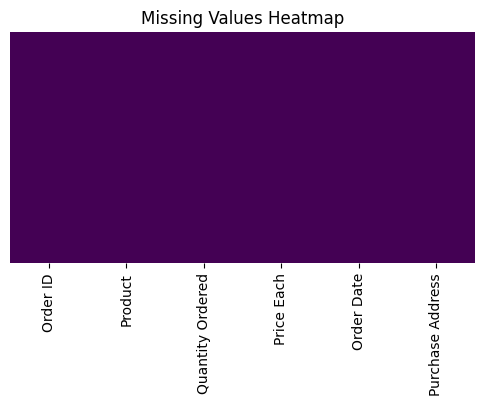

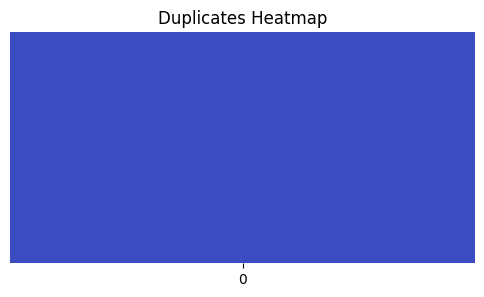

In [144]:




# List of analysis types
analysis_types = ['missing_values', 'duplicates']

for analysis in analysis_types:
    if analysis == 'missing_values':
        # Missing Values Heatmap
        plt.figure(figsize=(6, 3))  # Reduced size
        sns.heatmap(combined_data_cleaned.isnull(), cbar=False, cmap='viridis', yticklabels=False)
        plt.title('Missing Values Heatmap')
        plt.show()
        
       
    
    elif analysis == 'duplicates':
        # Duplicates Heatmap
        duplicates = combined_data_cleaned.duplicated(keep=False)
        plt.figure(figsize=(6, 3))  # Reduced size
        sns.heatmap(duplicates.values.reshape(-1, 1), cbar=False, cmap='coolwarm', yticklabels=False)
        plt.title('Duplicates Heatmap')
        plt.show()
        
      


### c. Product
- **Description:** The type of product sold.
- **Analysis:** Frequency distribution of each product.
- **Visualization:** Bar plot of product counts.

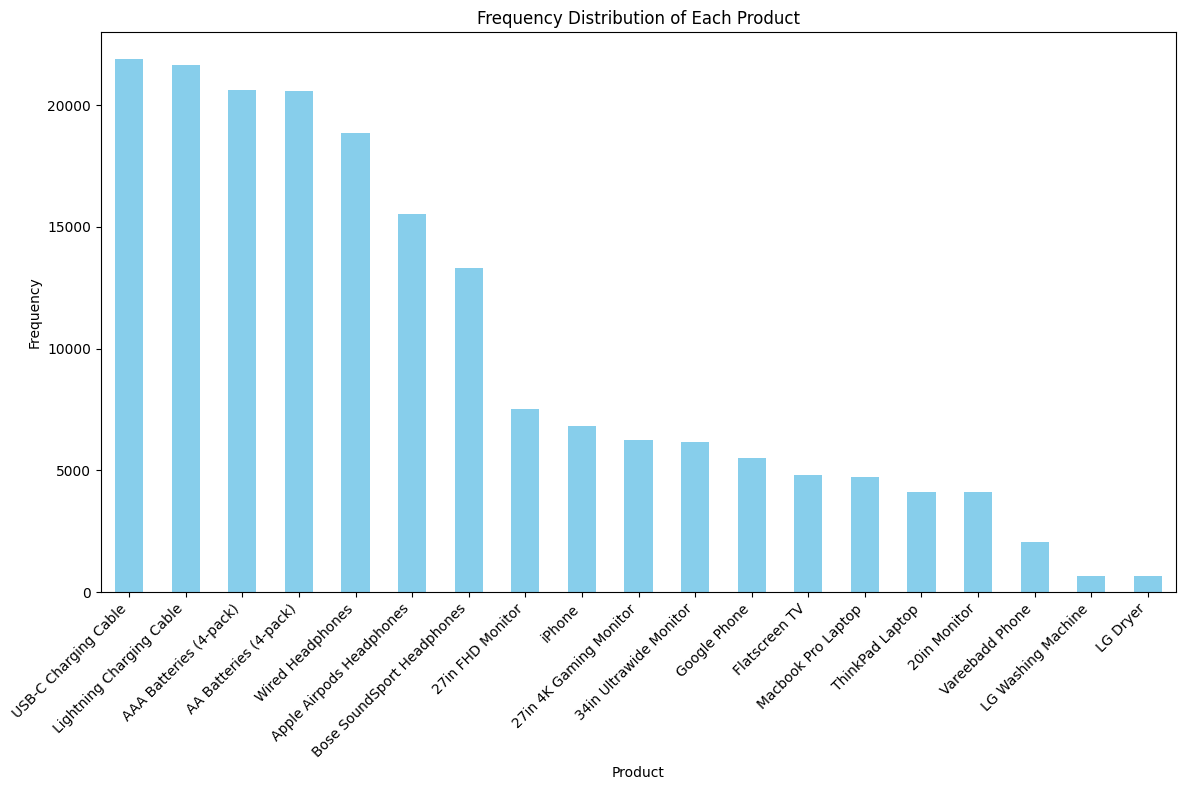

In [146]:


# Calculate the frequency distribution of each product
product_counts = combined_data_cleaned['Product'].value_counts()

# Plot
plt.figure(figsize=(12, 8))
product_counts.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Frequency Distribution of Each Product')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show plot
plt.tight_layout()
plt.show()


### d. Quantity Ordered
- **Description:** The quantity of each product ordered.
- **Analysis:** Summary statistics (mean, median, mode, standard deviation).
Distribution of quantities.
- **Visualization:** Histogram of quantities ordered.

Mean Quantity Ordered: 1.1243828986286637
Median Quantity Ordered: 1.0
Mode Quantity Ordered: 1
Standard Deviation of Quantity Ordered: 0.4427926240286697


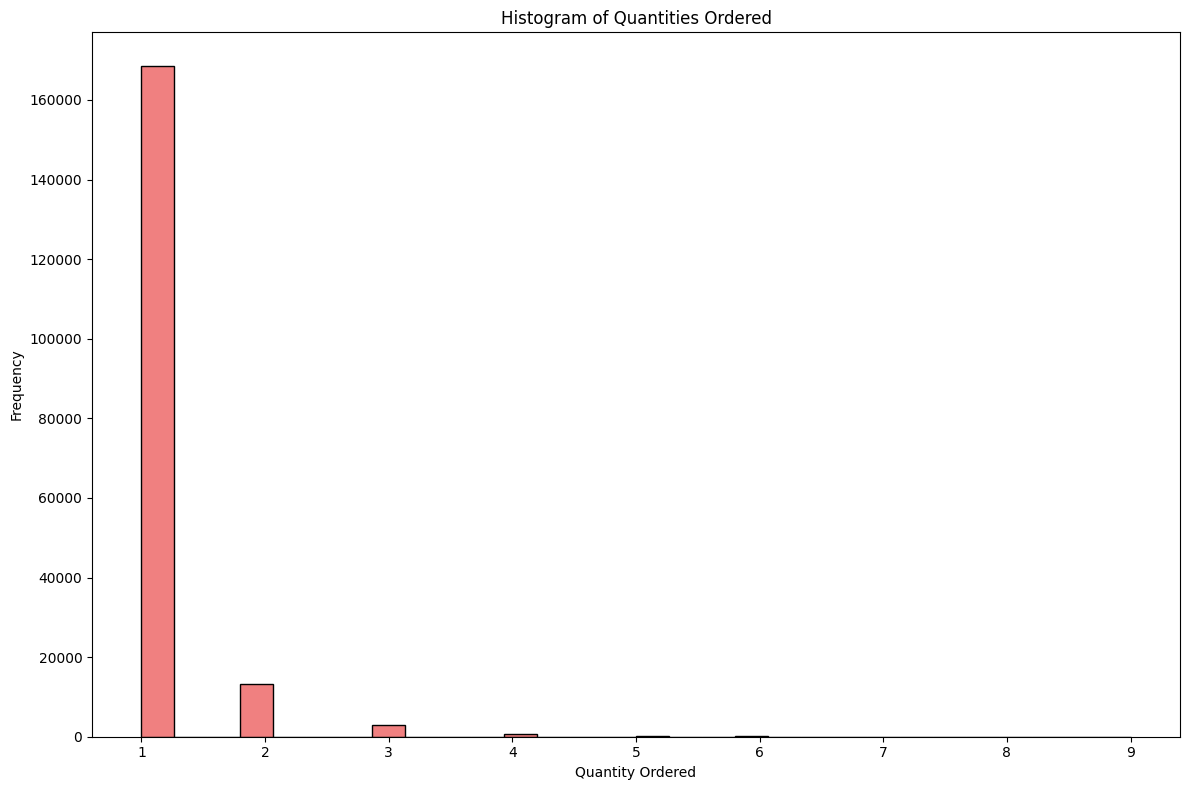

In [147]:


# Calculate summary statistics
quantity_stats = combined_data_cleaned['Quantity Ordered'].astype(int).describe()
mean_quantity = quantity_stats['mean']
median_quantity = combined_data_cleaned['Quantity Ordered'].astype(int).median()
mode_quantity = combined_data_cleaned['Quantity Ordered'].astype(int).mode()[0]
std_dev_quantity = quantity_stats['std']

# Print summary statistics
print(f"Mean Quantity Ordered: {mean_quantity}")
print(f"Median Quantity Ordered: {median_quantity}")
print(f"Mode Quantity Ordered: {mode_quantity}")
print(f"Standard Deviation of Quantity Ordered: {std_dev_quantity}")

# Plot Histogram
plt.figure(figsize=(12, 8))
plt.hist(combined_data_cleaned['Quantity Ordered'].astype(int), bins=30, color='lightcoral', edgecolor='black')

# Add titles and labels
plt.title('Histogram of Quantities Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')

# Show plot
plt.tight_layout()
plt.show()


### e. Price Each
- **Description:** The price of a single unit of the product.
-**Analysis:** Summary statistics (mean, median, mode, standard deviation).
Distribution of prices.
- **Visualization:** Histogram and box plot of prices.

Mean Price Each: 184.40
Median Price Each: 14.95
Mode Price Each: 150.00
Standard Deviation of Price Each: 332.73


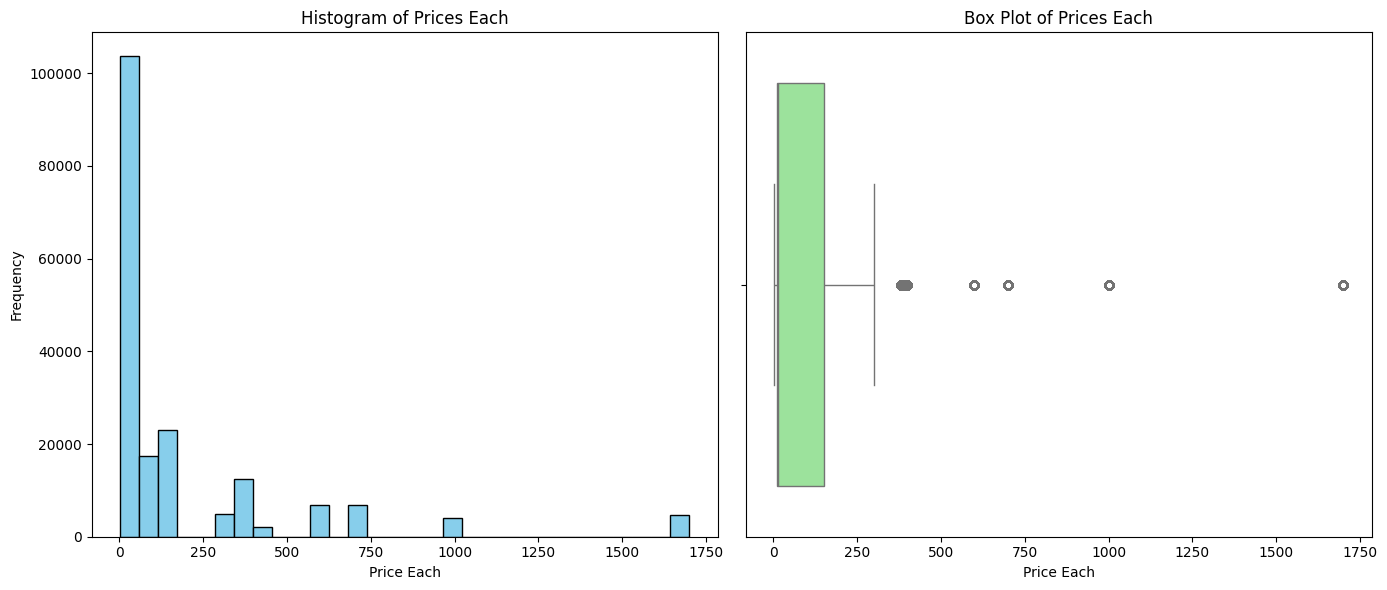

In [148]:


# Calculate summary statistics
price_stats = combined_data_cleaned['Price Each'].astype(float).describe()
mean_price = price_stats['mean']
median_price = combined_data_cleaned['Price Each'].astype(float).median()
mode_price = combined_data_cleaned['Price Each'].astype(float).mode()[0]
std_dev_price = price_stats['std']

# Print summary statistics
print(f"Mean Price Each: {mean_price:.2f}")
print(f"Median Price Each: {median_price:.2f}")
print(f"Mode Price Each: {mode_price:.2f}")
print(f"Standard Deviation of Price Each: {std_dev_price:.2f}")

# Plot Histogram
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(combined_data_cleaned['Price Each'].astype(float), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Prices Each')
plt.xlabel('Price Each')
plt.ylabel('Frequency')

# Plot Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=combined_data_cleaned['Price Each'].astype(float), color='lightgreen')
plt.title('Box Plot of Prices Each')
plt.xlabel('Price Each')

plt.tight_layout()
plt.show()


### f. Order Date
- **Description:** The date and time when the order was placed.
- **Analysis:**
Summary of the dates (range, most frequent date).
Trend analysis over time.
- **Visualization:** Time series plot or line plot of the number of orders over time.

Date Range: 2019-01-01 to 2020-01-01
Most Frequent Date: 2019-12-15
Total Number of Orders: 185950


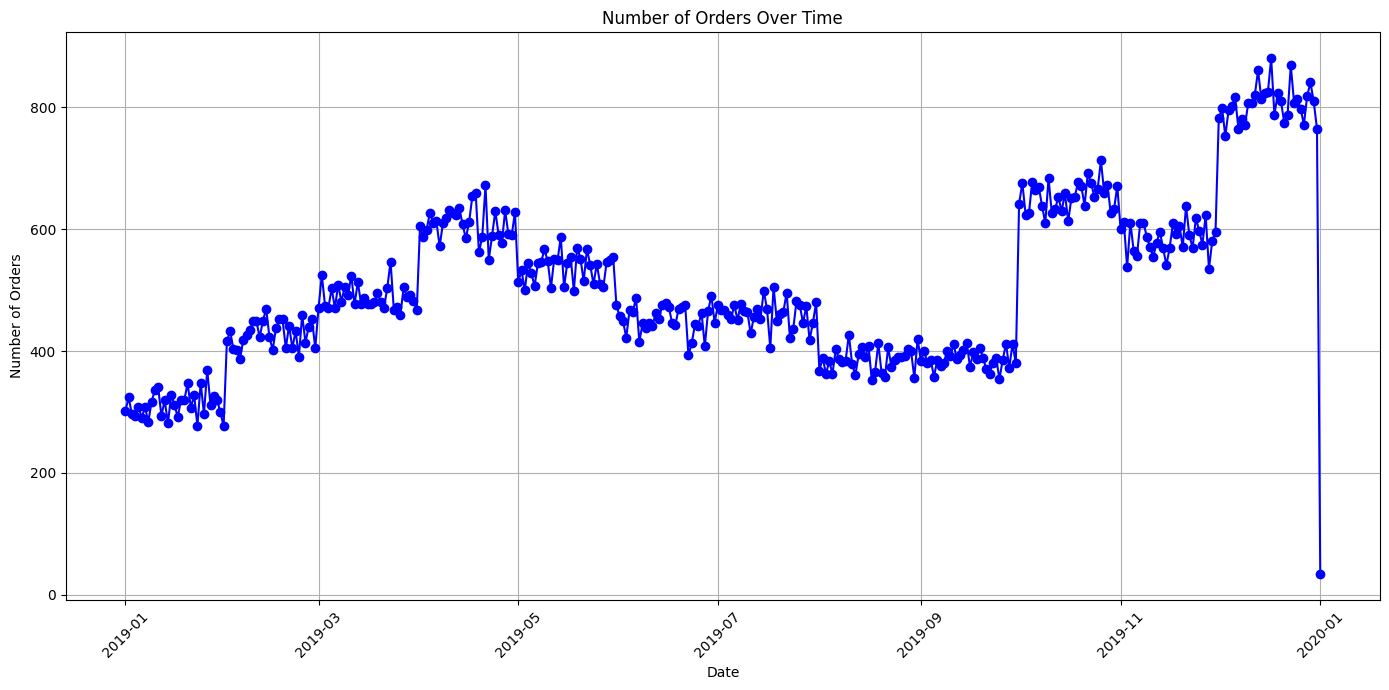

In [149]:

# Ensure 'Order Date' is converted to datetime
#combined_data_cleaned['Order Date'] = pd.to_datetime(combined_data_cleaned['Order Date'])

# Summary statistics
date_range = combined_data_cleaned['Order Date'].min(), combined_data_cleaned['Order Date'].max()
most_frequent_date = combined_data_cleaned['Order Date'].mode()[0]
total_orders = combined_data_cleaned.shape[0]

print(f"Date Range: {date_range[0].date()} to {date_range[1].date()}")
print(f"Most Frequent Date: {most_frequent_date.date()}")
print(f"Total Number of Orders: {total_orders}")

# Trend Analysis
# Resample data to count the number of orders per day
daily_orders = combined_data_cleaned.resample('D', on='Order Date').size()

# Plot Time Series
plt.figure(figsize=(14, 7))
plt.plot(daily_orders.index, daily_orders.values, marker='o', linestyle='-', color='b')
plt.title('Number of Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### g. Purchase Address
- **Description:** The address where the order was delivered.
- **Analysis:** Frequency of orders by city or state.
- **Visualization:** Bar plot of the number of orders by state.

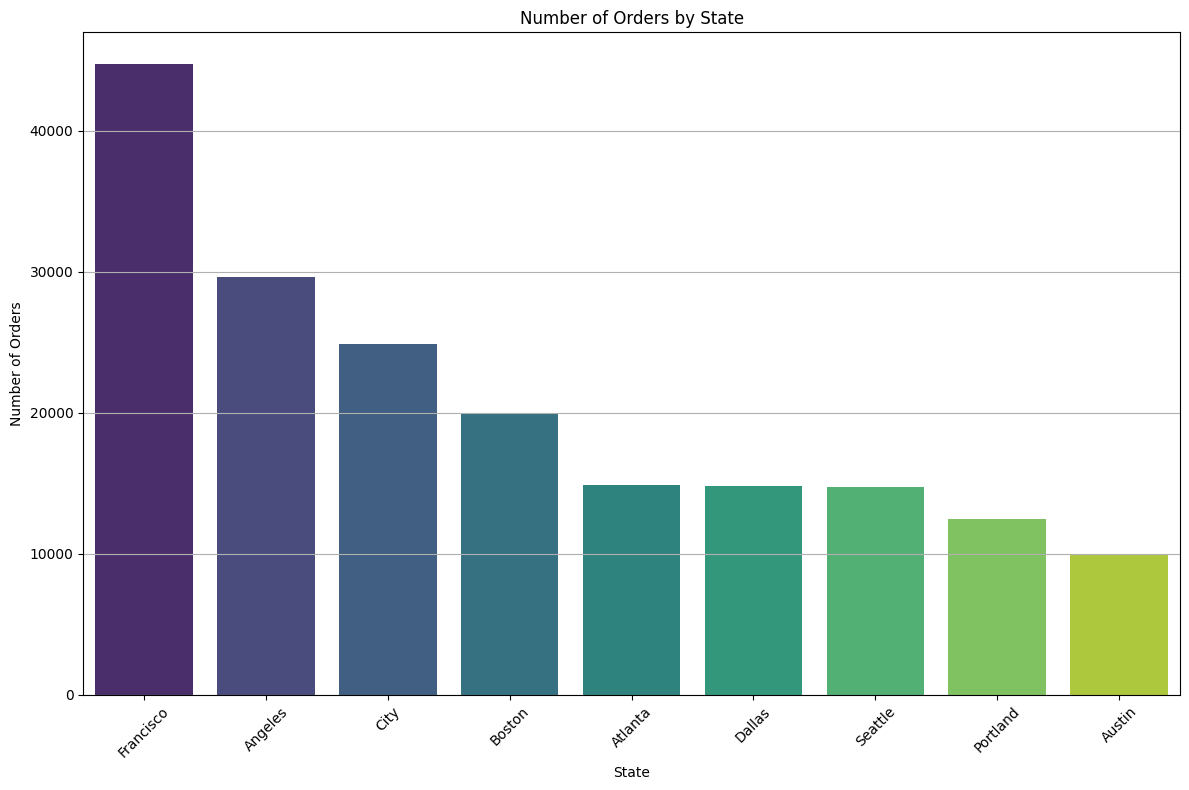

In [150]:

# Extract state information from 'Purchase Address'
def extract_state(address):
    return address.split(', ')[-2].split(' ')[-1]

combined_data_cleaned['State'] = combined_data_cleaned['Purchase Address'].apply(extract_state)

# Frequency Analysis
state_counts = combined_data_cleaned['State'].value_counts()

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')
plt.title('Number of Orders by State')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## 2. Bivariate Analysis
- Bivariate analysis explores the relationship between two variables.



### a. Quantity Ordered vs. Price Each
- **Analysis:** Scatter plot to see if there's a relationship between quantity and price.
Correlation coefficient to measure the strength of the relationship.


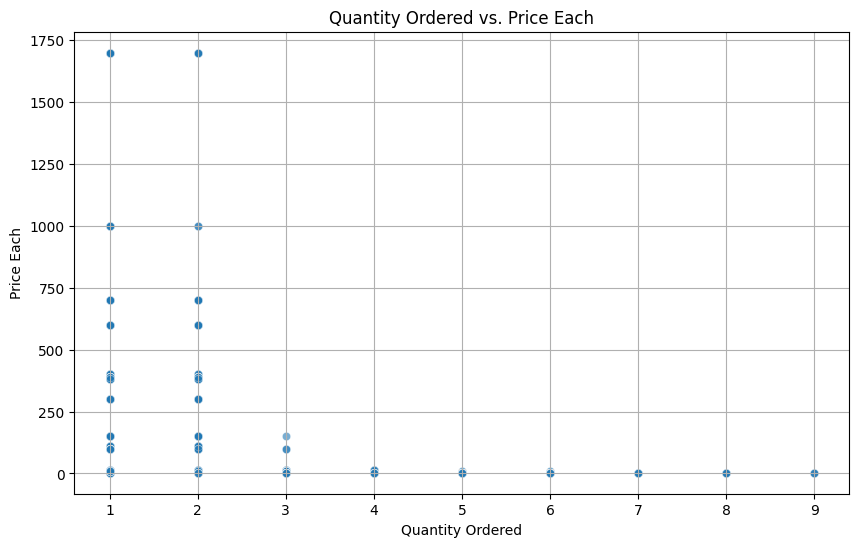

Correlation Coefficient between Quantity Ordered and Price Each: -0.15


In [151]:


# Convert 'Quantity Ordered' and 'Price Each' to numeric types
combined_data_cleaned['Quantity Ordered'] = pd.to_numeric(combined_data_cleaned['Quantity Ordered'], errors='coerce')
combined_data_cleaned['Price Each'] = pd.to_numeric(combined_data_cleaned['Price Each'], errors='coerce')

# Drop rows with NaN values after conversion
combined_data_cleaned = combined_data_cleaned.dropna(subset=['Quantity Ordered', 'Price Each'])

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity Ordered', y='Price Each', data=combined_data_cleaned, alpha=0.6)
plt.title('Quantity Ordered vs. Price Each')
plt.xlabel('Quantity Ordered')
plt.ylabel('Price Each')
plt.grid(True)
plt.show()

# Correlation Coefficient
correlation = combined_data_cleaned[['Quantity Ordered', 'Price Each']].corr().iloc[0, 1]
print(f'Correlation Coefficient between Quantity Ordered and Price Each: {correlation:.2f}')


- This implies that quantity ordered reduces with increase in price

### b. Product vs. Quantity Ordered
- **Analysis:** Box plot or bar plot to compare the distribution of quantities ordered for each product.

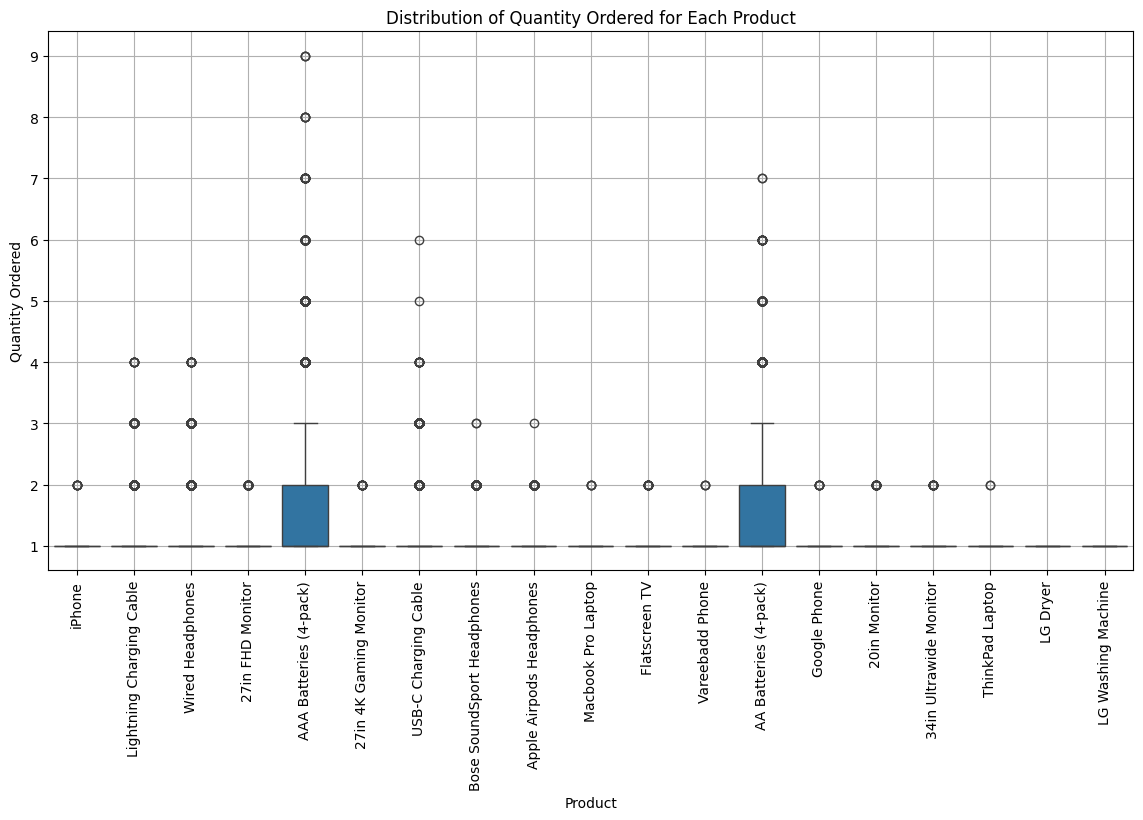

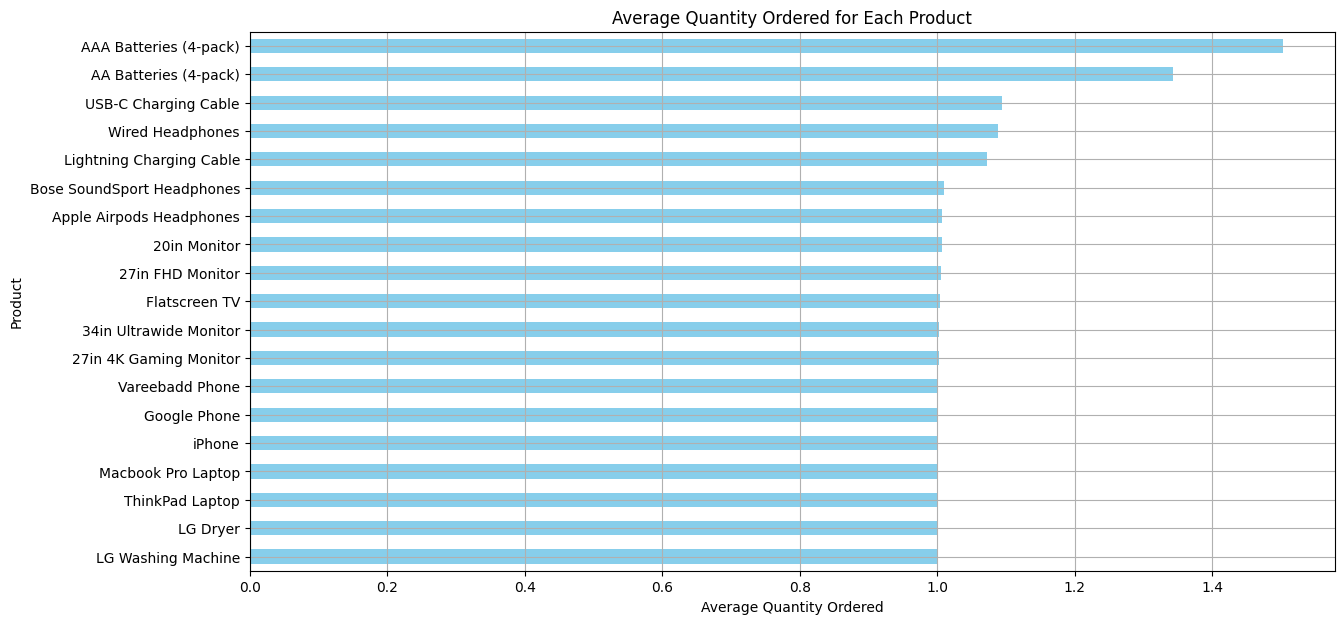

In [152]:


# Box Plot: Distribution of Quantity Ordered for Each Product
plt.figure(figsize=(14, 7))
sns.boxplot(x='Product', y='Quantity Ordered', data=combined_data_cleaned)
plt.xticks(rotation=90)
plt.title('Distribution of Quantity Ordered for Each Product')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.grid(True)
plt.show()

# Bar Plot: Average Quantity Ordered for Each Product
plt.figure(figsize=(14, 7))
average_quantity = combined_data_cleaned.groupby('Product')['Quantity Ordered'].mean().sort_values()
average_quantity.plot(kind='barh', color='skyblue')
plt.title('Average Quantity Ordered for Each Product')
plt.xlabel('Average Quantity Ordered')
plt.ylabel('Product')
plt.grid(True)
plt.show()


### c. Product vs. Price Each
- **Analysis:** Box plot to compare the distribution of prices for each product.

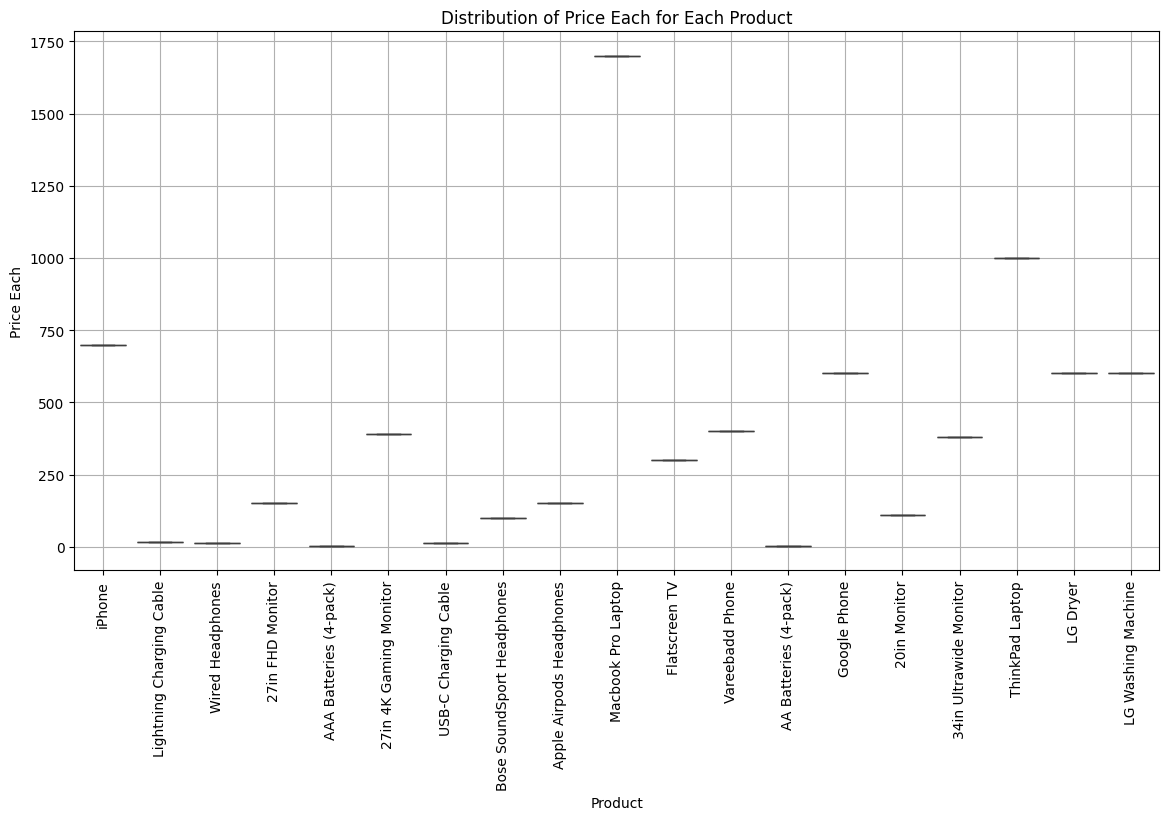

In [153]:


# Box Plot: Distribution of Price Each for Each Product
plt.figure(figsize=(14, 7))
sns.boxplot(x='Product', y='Price Each', data=combined_data_cleaned)
plt.xticks(rotation=90)
plt.title('Distribution of Price Each for Each Product')
plt.xlabel('Product')
plt.ylabel('Price Each')
plt.grid(True)
plt.show()




### d. Order Date vs. Quantity Ordered
- **Analysis:** Time series analysis to see if there’s any trend in the quantity ordered over time.
- **Visualization:** Line plot of total quantity ordered over time.


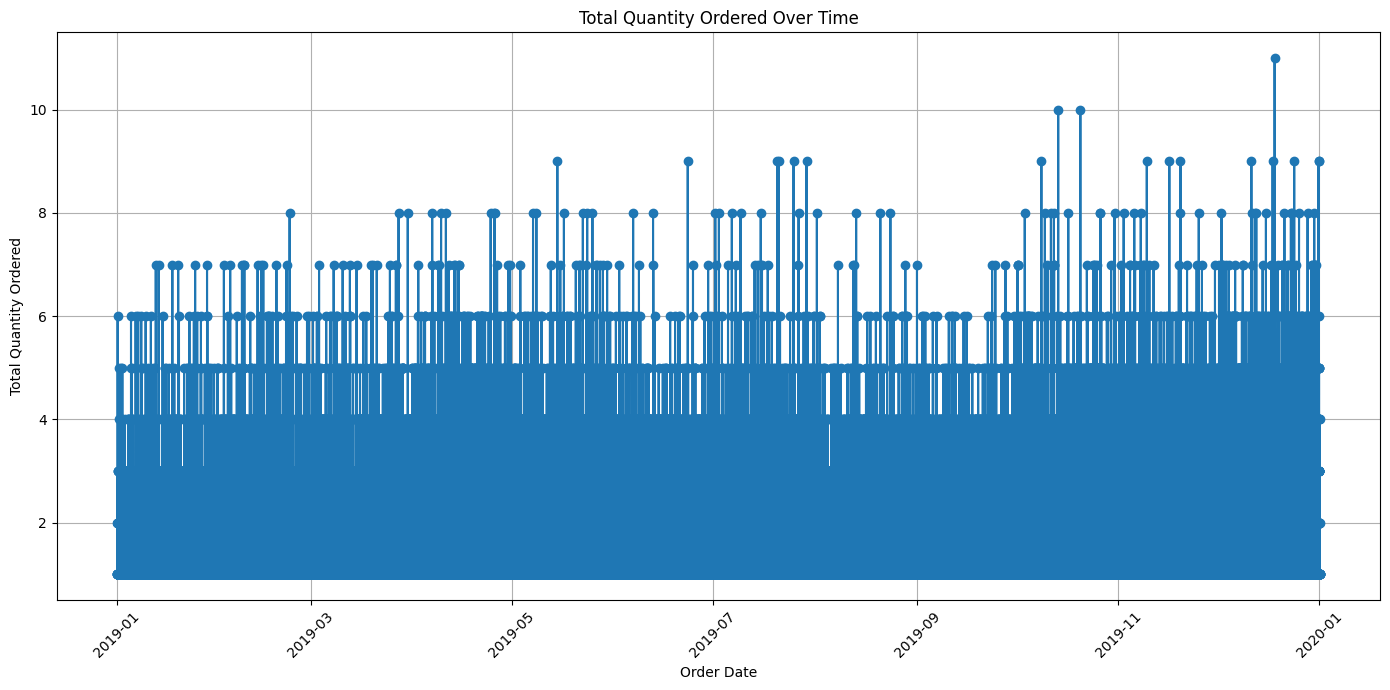

In [154]:


# Ensure 'Order Date' is in datetime format
combined_data_cleaned['Order Date'] = pd.to_datetime(combined_data_cleaned['Order Date'])

# Aggregate quantity ordered by date
quantity_over_time = combined_data_cleaned.groupby('Order Date')['Quantity Ordered'].sum().reset_index()

# Line Plot: Total Quantity Ordered Over Time
plt.figure(figsize=(14, 7))
plt.plot(quantity_over_time['Order Date'], quantity_over_time['Quantity Ordered'], marker='o')
plt.title('Total Quantity Ordered Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Quantity Ordered')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 3. Multivariate Analysis
- Multivariate analysis examines relationships among more than two variables.

### a. Product, Quantity Ordered, and Price Each
- **Analysis:** 3D scatter plot or pair plot to explore the relationship among these three variables.
Grouped bar plots or grouped box plots to compare quantities and prices across different products.

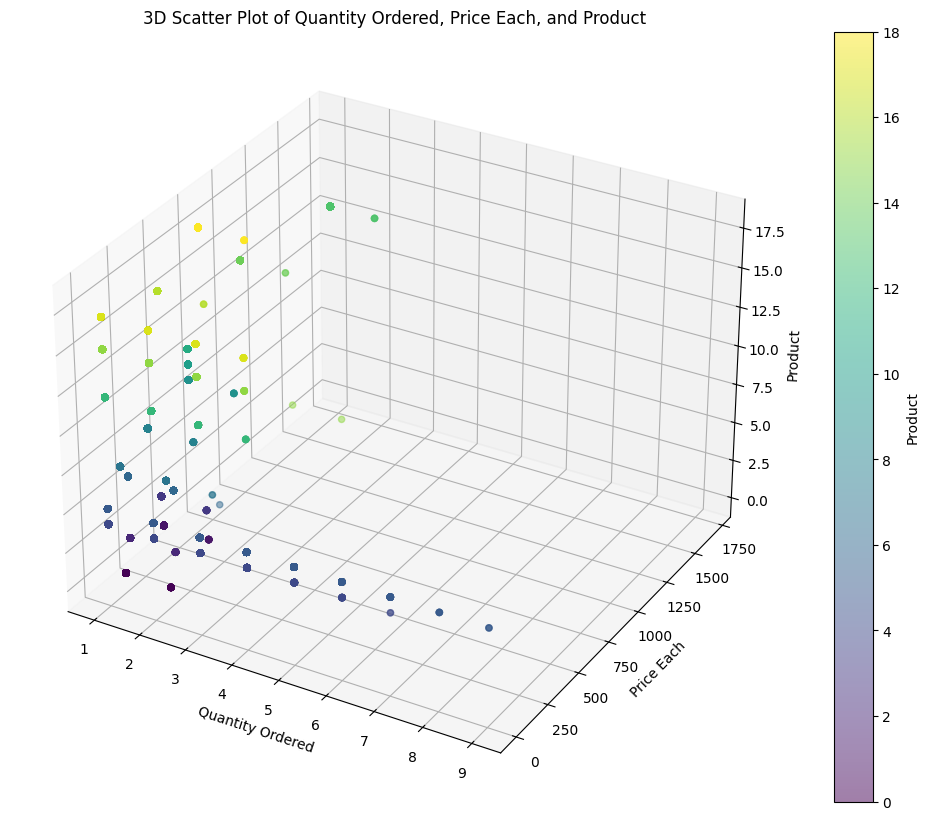

In [155]:


# Convert 'Quantity Ordered' and 'Price Each' to numeric
combined_data_cleaned['Quantity Ordered'] = pd.to_numeric(combined_data_cleaned['Quantity Ordered'], errors='coerce')
combined_data_cleaned['Price Each'] = pd.to_numeric(combined_data_cleaned['Price Each'], errors='coerce')

# Drop any rows with NaN values in the relevant columns
combined_data_cleaned.dropna(subset=['Quantity Ordered', 'Price Each'], inplace=True)

# Create a 3D scatter plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(combined_data_cleaned['Quantity Ordered'], combined_data_cleaned['Price Each'], 
                     combined_data_cleaned['Product'].astype('category').cat.codes, 
                     c=combined_data_cleaned['Product'].astype('category').cat.codes, cmap='viridis', alpha=0.5)

# Labels
ax.set_xlabel('Quantity Ordered')
ax.set_ylabel('Price Each')
ax.set_zlabel('Product')
ax.set_title('3D Scatter Plot of Quantity Ordered, Price Each, and Product')

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Product')

plt.show()


### b. Order Date, Quantity Ordered, and Product
- **Analysis:** Time series analysis with different products to observe trends in quantity ordered over time for each product.
- **Visualization:** Multiple line plots for different products showing quantity ordered over time.

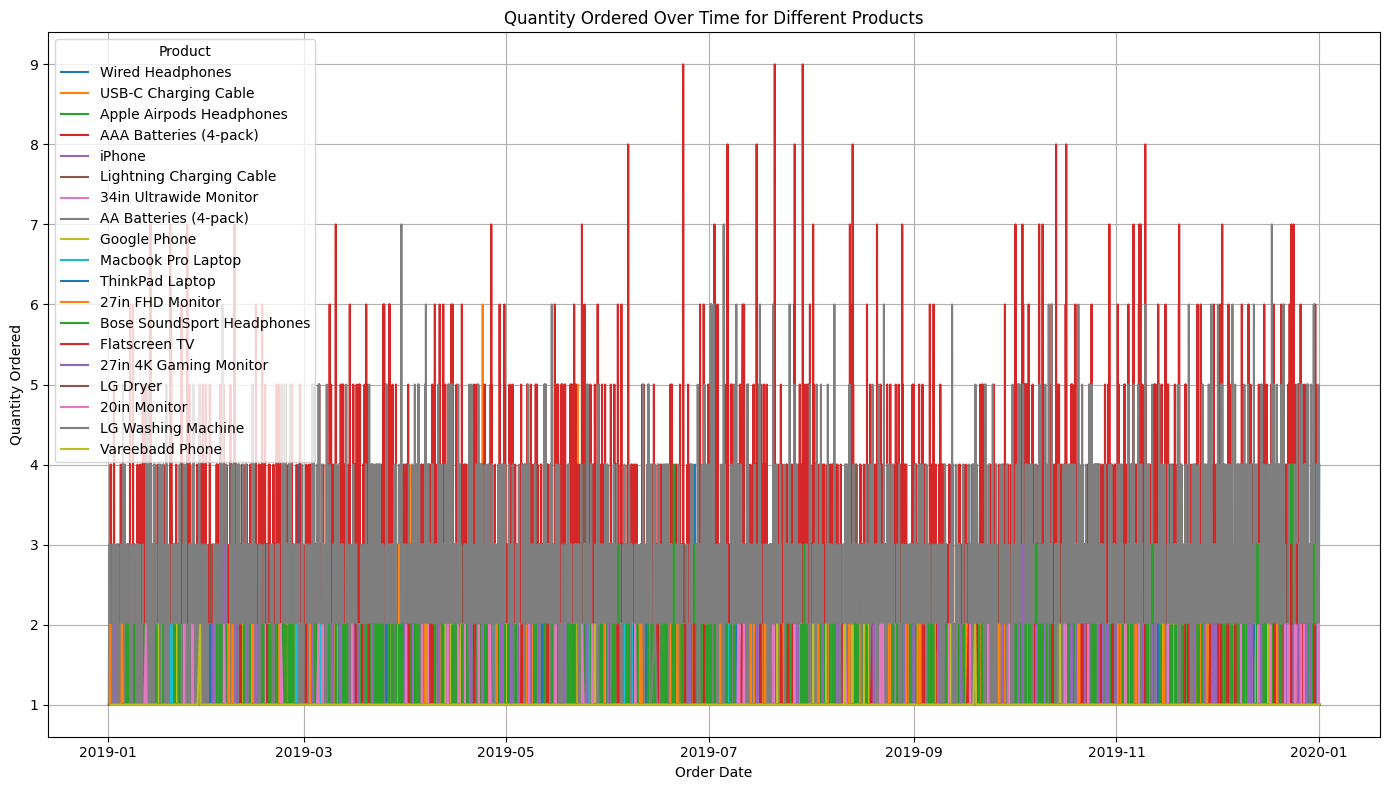

In [156]:


# Convert 'Order Date' to datetime
combined_data_cleaned['Order Date'] = pd.to_datetime(combined_data_cleaned['Order Date'])

# Convert 'Quantity Ordered' to numeric
combined_data_cleaned['Quantity Ordered'] = pd.to_numeric(combined_data_cleaned['Quantity Ordered'], errors='coerce')

# Drop rows with NaN values in 'Quantity Ordered'
combined_data_cleaned.dropna(subset=['Quantity Ordered'], inplace=True)

# Group by 'Order Date' and 'Product', and sum 'Quantity Ordered'
time_series_data = combined_data_cleaned.groupby(['Order Date', 'Product']).agg({'Quantity Ordered': 'sum'}).reset_index()

# Plotting
plt.figure(figsize=(14, 8))

# List of unique products
products = time_series_data['Product'].unique()

for product in products:
    product_data = time_series_data[time_series_data['Product'] == product]
    plt.plot(product_data['Order Date'], product_data['Quantity Ordered'], label=product)

plt.xlabel('Order Date')
plt.ylabel('Quantity Ordered')
plt.title('Quantity Ordered Over Time for Different Products')
plt.legend(title='Product')
plt.grid(True)
plt.tight_layout()
plt.show()





### c. Product, Quantity Ordered, Price Each, and Order Date
- **Analysis:** Analyze how the combination of these variables affects overall sales trends.
- **Visualization:** Heatmap showing correlations or a facet grid to compare trends across products and time.

In [157]:


# Convert 'Order Date' to datetime
#combined_data_cleaned['Order Date'] = pd.to_datetime(combined_data_cleaned['Order Date'])

# Convert 'Quantity Ordered' and 'Price Each' to numeric
combined_data_cleaned['Quantity Ordered'] = pd.to_numeric(combined_data_cleaned['Quantity Ordered'], errors='coerce')
combined_data_cleaned['Price Each'] = pd.to_numeric(combined_data_cleaned['Price Each'], errors='coerce')

# Drop rows with NaN values in relevant columns
combined_data_cleaned.dropna(subset=['Quantity Ordered', 'Price Each'], inplace=True)

# Add a new column for Total Sales
combined_data_cleaned['Total Sales'] = combined_data_cleaned['Quantity Ordered'] * combined_data_cleaned['Price Each']


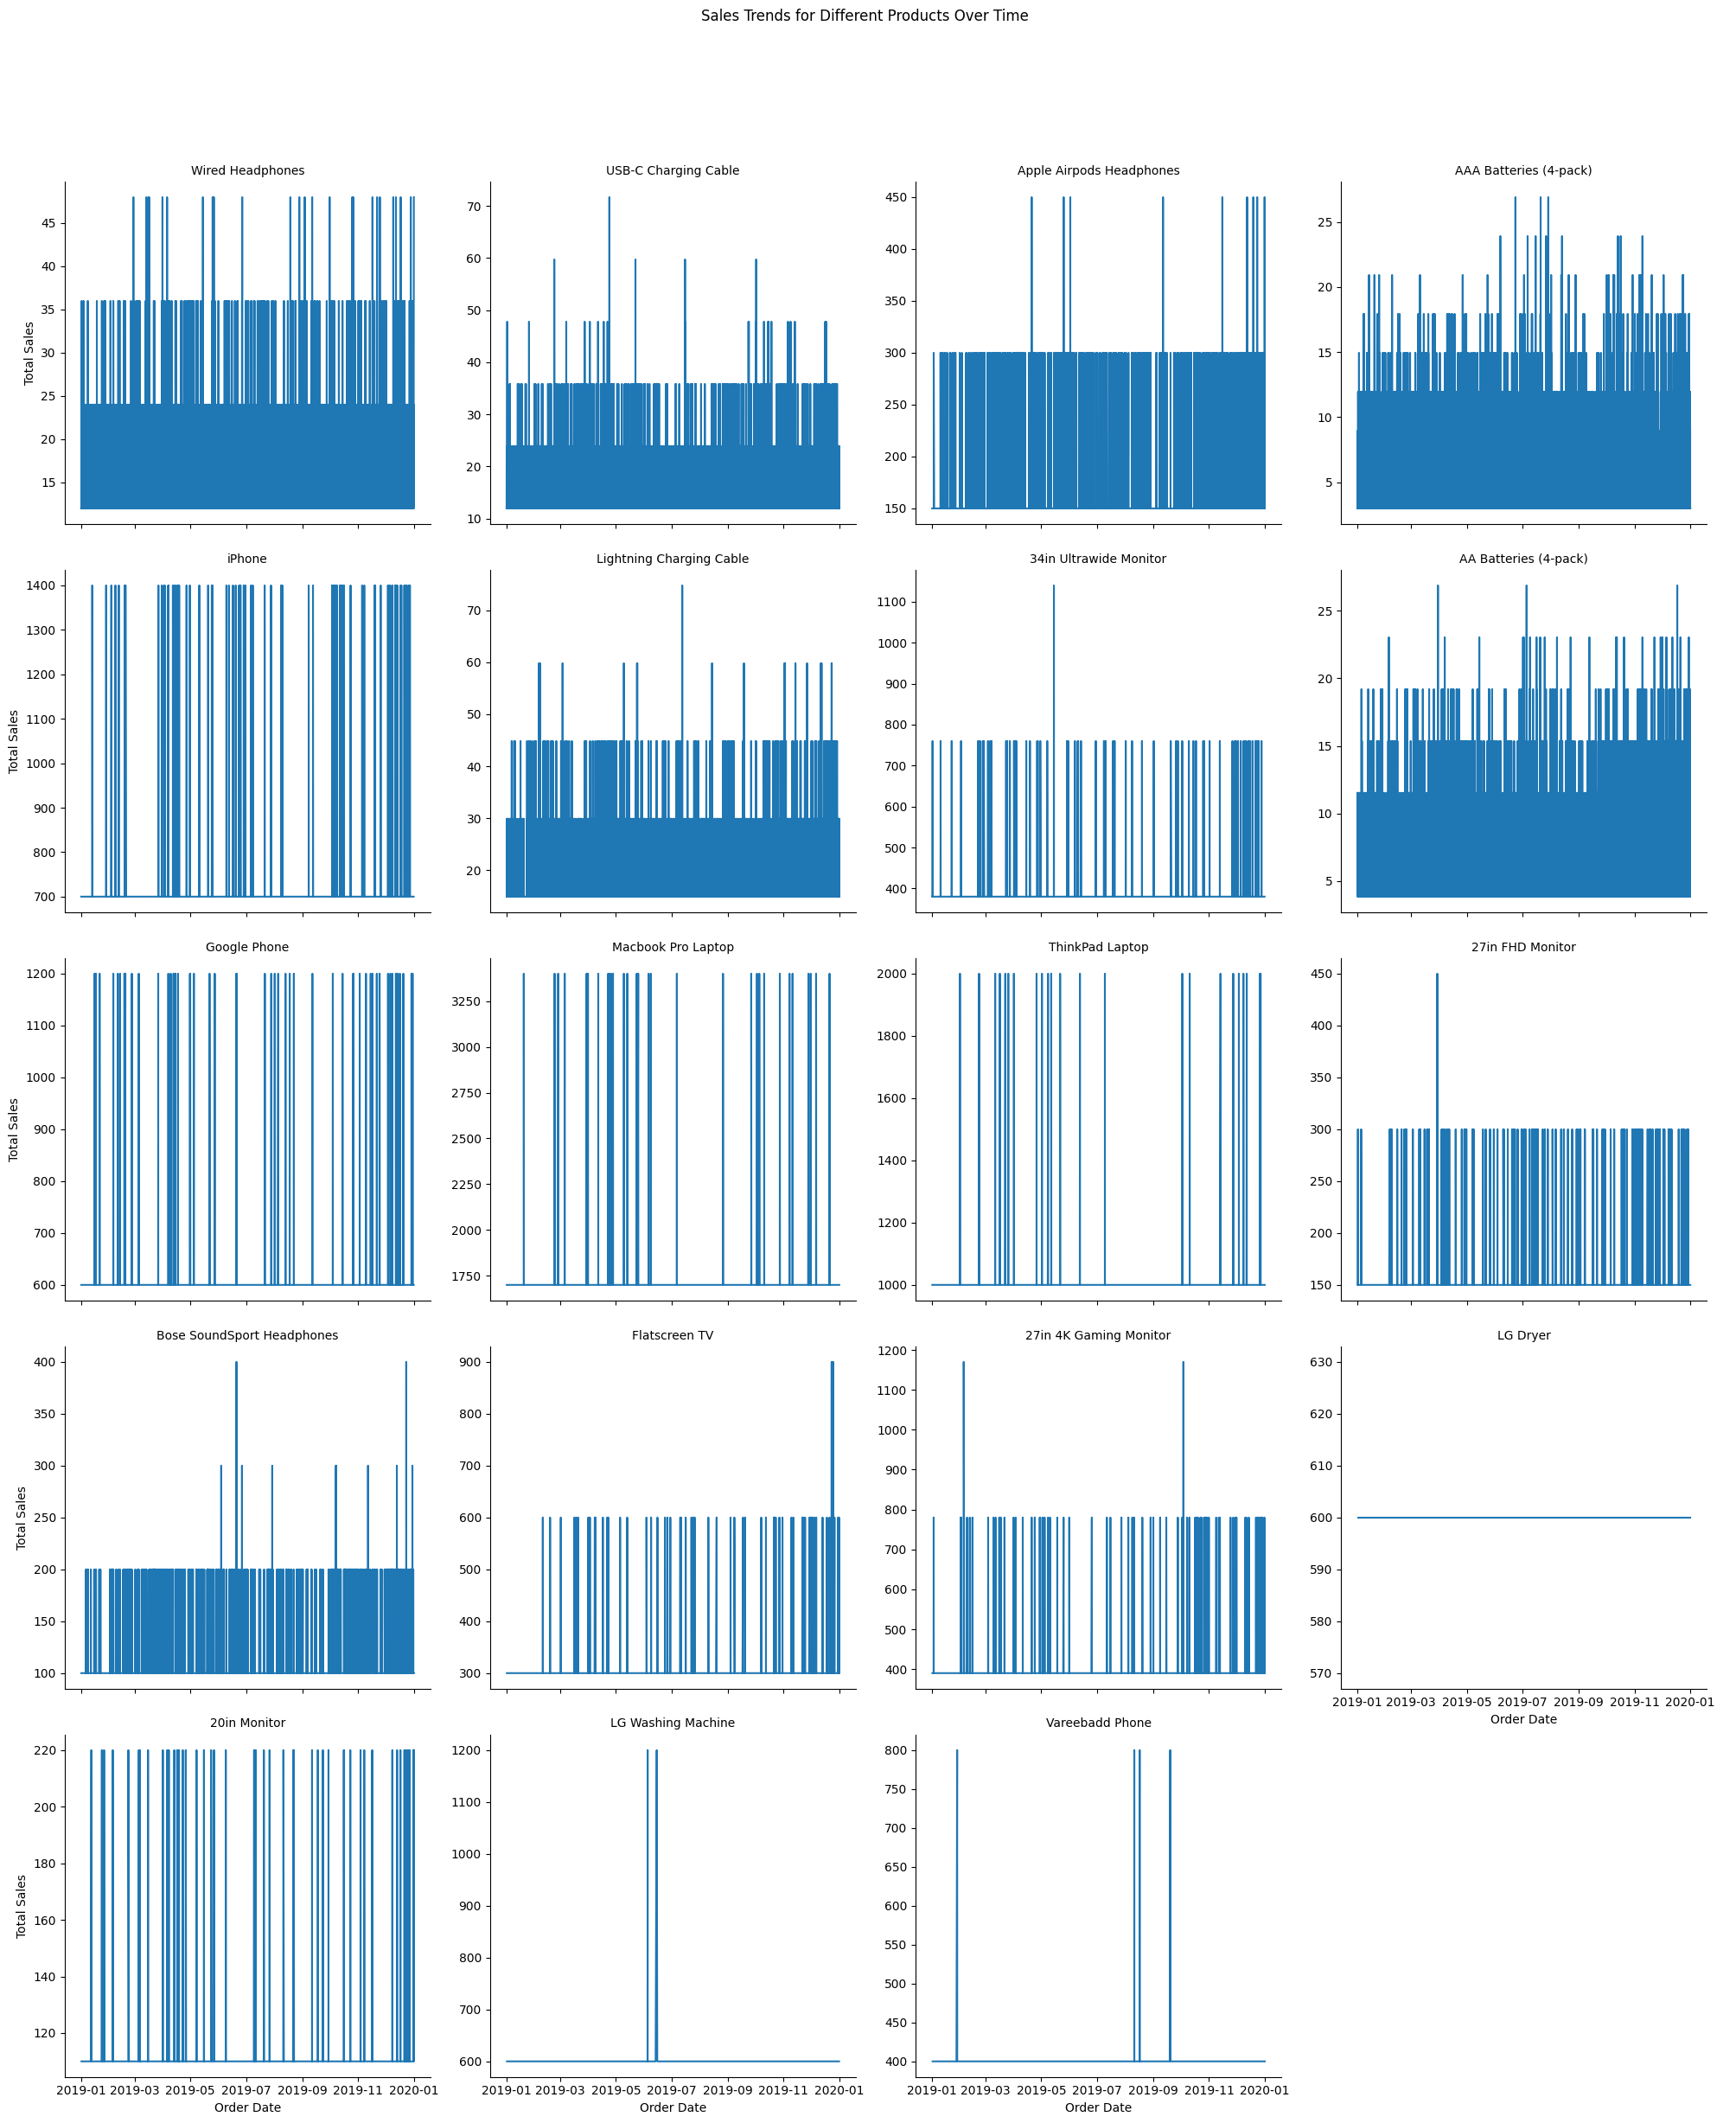

In [158]:


# Group by 'Order Date' and 'Product', and aggregate total sales
facet_data = combined_data_cleaned.groupby(['Order Date', 'Product']).agg({'Total Sales': 'sum'}).reset_index()

# Create a facet grid
g = sns.FacetGrid(facet_data, col='Product', col_wrap=4, height=5, sharex=True, sharey=False)
g.map_dataframe(sns.lineplot, x='Order Date', y='Total Sales')
g.set_axis_labels('Order Date', 'Total Sales')
g.set_titles(col_template="{col_name}")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Sales Trends for Different Products Over Time')
plt.show()
